# <h1 style="text-align: center;"> Facial Keypoints Detection <br> (*Puntos clave para la detección de caras*) </h1>

Team 3:<br>
ENGELS , ULRIKE<br>
VALENZUELA CAMACHO, SARA LUZ<br>
VANLEKE , TIBO<br>
VENEGAS SANCHEZ, GABRIELA PATRICIA<br>

### Importing Libraries  (*Importamos las Bibliotecas*)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading data (*Leemos los datos*)

In [3]:
train_data = pd.read_csv('training.csv')
test_data = pd.read_csv('test.csv')

### How many records and fields do we have? (*¿Cuántas columnas y renglones tenemos?*)

In [4]:
train_data.shape

(7049, 31)

### Print first 10 records (*Leemos los primeros 10 renglones*)

In [5]:
train_data.head(10)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,...,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766,167 169 170 167 156 145 106 68 52 24 20 15 21 ...
6,64.131866,34.290040,29.578953,33.138040,57.797154,35.154040,69.026577,34.290040,34.761664,33.714040,...,53.006174,55.781799,70.570953,33.898309,70.282953,45.127732,65.099597,45.415732,78.057020,109 109 125 141 145 139 120 81 45 34 31 35 36 ...
7,67.468893,39.413452,29.355961,39.621717,59.554951,40.454773,75.591612,40.038245,37.478214,40.454773,...,56.907961,66.843961,80.025786,30.189204,81.275184,48.100194,71.278602,48.516816,91.063922,178 177 178 179 179 179 181 185 188 184 192 20...
8,65.802880,34.755200,27.475840,36.185600,58.652160,37.329280,72.952960,35.899520,36.342400,37.043200,...,55.348480,65.516800,73.368320,31.194240,74.798080,49.213440,67.648000,49.499520,83.093120,164 158 118 76 66 69 59 53 43 31 35 41 45 55 6...
9,64.121231,36.740308,29.468923,38.390154,58.620923,37.840615,71.272000,37.290338,36.344615,39.490462,...,54.341538,65.771692,69.192615,32.769231,72.217846,49.270154,67.542769,49.545231,76.893538,226 227 225 224 221 220 215 210 210 208 206 18...


### We look at the fields names (*Revisamos los nombres de las columnas*)

In [6]:
pd.Series(train_data.columns)

0             left_eye_center_x
1             left_eye_center_y
2            right_eye_center_x
3            right_eye_center_y
4       left_eye_inner_corner_x
5       left_eye_inner_corner_y
6       left_eye_outer_corner_x
7       left_eye_outer_corner_y
8      right_eye_inner_corner_x
9      right_eye_inner_corner_y
10     right_eye_outer_corner_x
11     right_eye_outer_corner_y
12     left_eyebrow_inner_end_x
13     left_eyebrow_inner_end_y
14     left_eyebrow_outer_end_x
15     left_eyebrow_outer_end_y
16    right_eyebrow_inner_end_x
17    right_eyebrow_inner_end_y
18    right_eyebrow_outer_end_x
19    right_eyebrow_outer_end_y
20                   nose_tip_x
21                   nose_tip_y
22          mouth_left_corner_x
23          mouth_left_corner_y
24         mouth_right_corner_x
25         mouth_right_corner_y
26       mouth_center_top_lip_x
27       mouth_center_top_lip_y
28    mouth_center_bottom_lip_x
29    mouth_center_bottom_lip_y
30                        Image
dtype: o

### We check the type of data and if there is missing values (*Revisamos el tipo de datos y si hay faltantes*)

In [7]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

### Since there are  a lot of missing values, we calculate how many are missing per field (*Como hay muchos datos faltantes, calculamos cuántos faltan por campo*)

In [8]:
for col in train_data.columns.tolist():          
    print('{}, column missing values: {}'.format(col, train_data[col].isnull().sum()))

left_eye_center_x, column missing values: 10
left_eye_center_y, column missing values: 10
right_eye_center_x, column missing values: 13
right_eye_center_y, column missing values: 13
left_eye_inner_corner_x, column missing values: 4778
left_eye_inner_corner_y, column missing values: 4778
left_eye_outer_corner_x, column missing values: 4782
left_eye_outer_corner_y, column missing values: 4782
right_eye_inner_corner_x, column missing values: 4781
right_eye_inner_corner_y, column missing values: 4781
right_eye_outer_corner_x, column missing values: 4781
right_eye_outer_corner_y, column missing values: 4781
left_eyebrow_inner_end_x, column missing values: 4779
left_eyebrow_inner_end_y, column missing values: 4779
left_eyebrow_outer_end_x, column missing values: 4824
left_eyebrow_outer_end_y, column missing values: 4824
right_eyebrow_inner_end_x, column missing values: 4779
right_eyebrow_inner_end_y, column missing values: 4779
right_eyebrow_outer_end_x, column missing values: 4813
right_eye

### Before operatig with all images, we will do a test with just the first one (*Antes de operar con todas las imágenes, haremos una prueba con la primera*)

In [9]:
img_dt = []

In [10]:
img_dt.append(train_data['Image'][0].split(' '))

In [11]:
Imagen = np.array(img_dt, dtype='float')
Imagen.shape

(1, 9216)

In [12]:
Imagen.shape[0]

1

In [13]:
Imagen = Imagen.reshape(Imagen.shape[0],96,96)
Imagen.shape

(1, 96, 96)

In [14]:
X_prom=Imagen.mean(axis=0)
X_prom.shape

(96, 96)

### The mean value of just one image should be the same image (*El promedio de una sola imagen debe ser la misma imagen*)

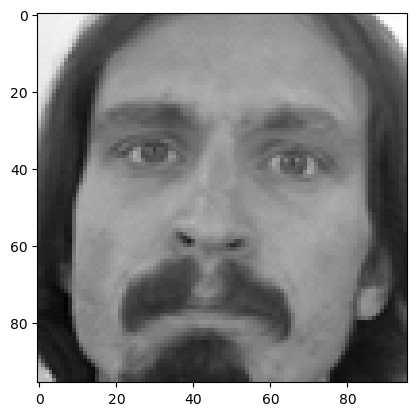

In [15]:
plt.imshow(X_prom,cmap='gray')
plt.show()

### And he standard deviation should be cero (*Y la desviación estándar debe ser cero*)

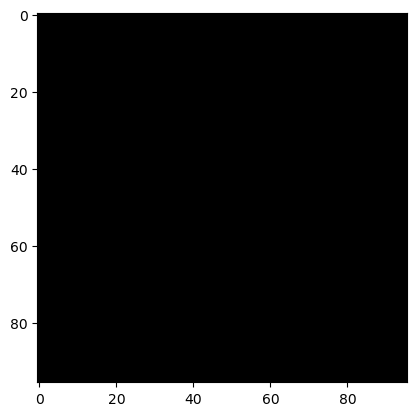

In [16]:
X_std=Imagen.std(axis=0)
plt.imshow(X_std,cmap='gray')
plt.show()

### Now we do the same for all images (*Ahora hacemos lo mismo con todas las imágenes*)

In [17]:
img_dt = [] 
for i in range(len(train_data)):
#    print(i)
    img_dt.append(train_data['Image'][i].split(' '))
X=np.array(img_dt, dtype='float')


In [18]:
X.shape

(7049, 9216)

In [19]:
X = X.reshape(X.shape[0],96,96)
X.shape

(7049, 96, 96)

### We find the mean (*Obtenemos el promedio*)

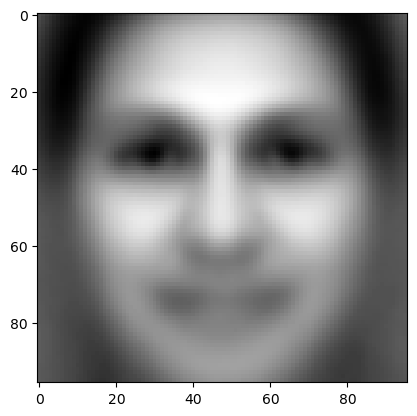

In [20]:
X_prom=X.mean(axis=0)
X_prom.shape
plt.imshow(X_prom,cmap='gray')
plt.show()

### And the standard deviation (*Y la desviación estándar*)

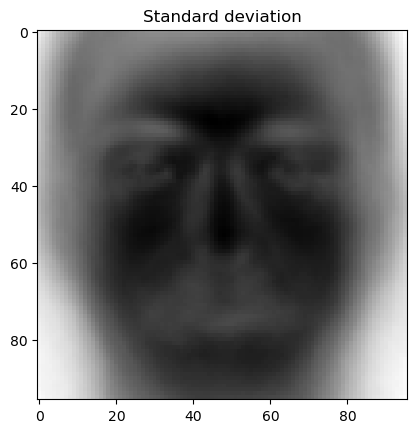

In [21]:
X_std=X.std(axis=0)
plt.imshow(X_std,cmap='gray')
plt.title("Standard deviation")
plt.show()

### Two examples of missing values (*Dos ejemplos de valores faltantes*)

nan
nan


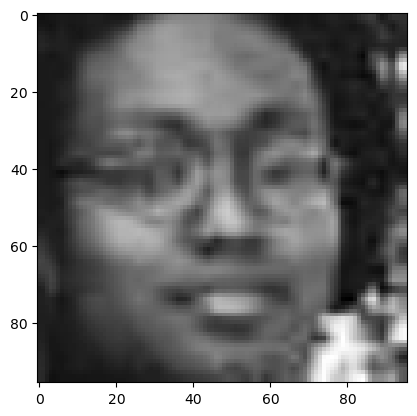

In [22]:
print(train_data['left_eyebrow_outer_end_x'][3000])
print(train_data['right_eyebrow_outer_end_x'][3000])

img_dt = []
img_dt.append(train_data['Image'][3000].split(' '))
Imagen = np.array(img_dt, dtype='float')
Imagen = Imagen.reshape(Imagen.shape[0],96,96)
plt.imshow(Imagen.mean(axis=0),cmap='gray')
plt.show()

nan
nan


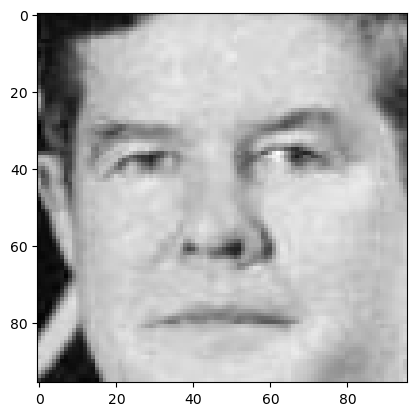

In [23]:
print(train_data['left_eyebrow_outer_end_x'][4000])
print(train_data['right_eyebrow_outer_end_x'][4000])

img_dt = []
img_dt.append(train_data['Image'][4000].split(' '))
Imagen = np.array(img_dt, dtype='float')
Imagen = Imagen.reshape(Imagen.shape[0],96,96)
plt.imshow(Imagen.mean(axis=0),cmap='gray')
plt.show()

### Averages of the coordinates (*Promedio de las coordenadas*)

In [24]:
y=np.array(train_data.iloc[:,:30])
coord_prom = np.nanmean (y, axis=0)
coord_prom

array([66.35902124, 37.65123419, 30.30610151, 37.97694257, 59.15933944,
       37.94475233, 73.33047798, 37.70700831, 36.65260695, 37.98990191,
       22.38450448, 38.03349518, 56.06851308, 29.33267825, 79.48282586,
       29.73486073, 39.32213692, 29.50299847, 15.87117747, 30.42816591,
       48.37418629, 62.7158836 , 63.28573512, 75.97071434, 32.9004037 ,
       76.17976785, 47.97541157, 72.9194426 , 48.56947217, 78.97014625])

### x-coordinates (*componentes en x*)

In [25]:
coord_prom[0::2]

array([66.35902124, 30.30610151, 59.15933944, 73.33047798, 36.65260695,
       22.38450448, 56.06851308, 79.48282586, 39.32213692, 15.87117747,
       48.37418629, 63.28573512, 32.9004037 , 47.97541157, 48.56947217])

### y-coordinates (*componentes en y*)

In [26]:
coord_prom[1::2]

array([37.65123419, 37.97694257, 37.94475233, 37.70700831, 37.98990191,
       38.03349518, 29.33267825, 29.73486073, 29.50299847, 30.42816591,
       62.7158836 , 75.97071434, 76.17976785, 72.9194426 , 78.97014625])

### Plotting averages (*Graficando los promedios*)

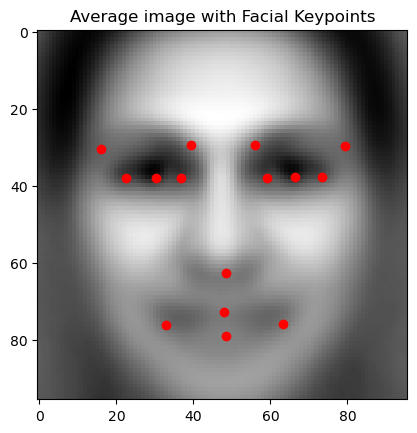

In [27]:
plt.scatter(coord_prom[0::2], coord_prom[1::2], c='red', marker='o')
plt.imshow(X_prom,cmap='gray')
plt.title("Average image with Facial Keypoints")
plt.show()

### Standard deviation of coordinates (*Desviación estándard de las coordenadas*)

In [28]:
y=np.array(train_data.iloc[:,:30])
coord_desv = np.nanstd (y, axis=0)
print(coord_desv)

[3.4479883  3.15270181 3.08301092 3.03340558 2.68976148 2.30682349
 3.40510106 2.88080231 2.34974951 2.31139715 3.05644771 2.90972667
 3.48471753 3.07745546 3.98532843 3.77289544 3.20893442 3.10618509
 3.62172295 3.86490709 4.27973472 5.72016092 4.0781642  4.5787143
 3.96367891 4.41684068 3.32232958 5.22135228 4.26965634 5.40745879]


In [29]:
train_data.columns[np.where(coord_desv==max(coord_desv))]

Index(['nose_tip_y'], dtype='object')

In [43]:
train_data.columns[np.where(coord_desv==min(coord_desv))]

Index(['left_eye_inner_corner_y'], dtype='object')

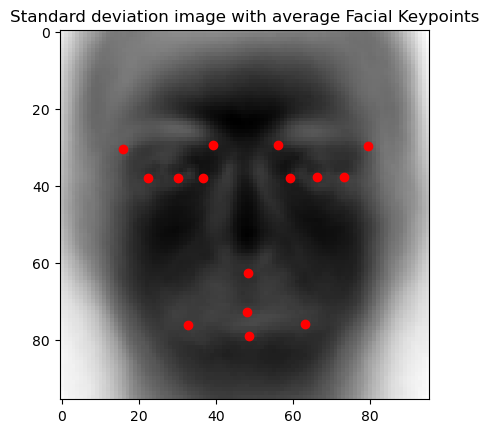

In [30]:
X_std=X.std(axis=0)
plt.imshow(X_std,cmap='gray')
plt.scatter(coord_prom[0::2], coord_prom[1::2], c='red', marker='o')
plt.title("Standard deviation image with average Facial Keypoints")
plt.show()

In [32]:
Xdesv = coord_desv[0::2]
Ydesv = coord_desv[1::2]
Xcoord = coord_prom[0::2]
Ycoord = coord_prom[1::2]
left = Xcoord-Xdesv
right = Xcoord+Xdesv
up = Ycoord-Ydesv
down = Ycoord+Ydesv

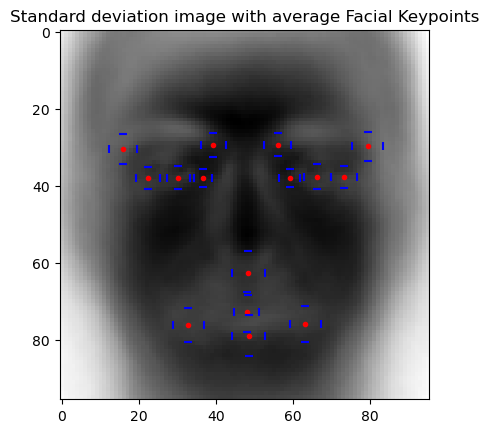

In [42]:
plt.imshow(X_std,cmap='gray')
plt.scatter(coord_prom[0::2], coord_prom[1::2], c='red', marker='.')
plt.scatter(left, coord_prom[1::2], c='blue', marker='|')
plt.scatter(right, coord_prom[1::2], c='blue', marker='|')
plt.scatter(coord_prom[0::2], up, c='blue', marker='_')
plt.scatter(coord_prom[0::2], down, c='blue', marker='_')
plt.title("Standard deviation image with average Facial Keypoints")
plt.show()